In [1]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [2]:
parameters = {}
parameters["treino_dataset"] = 0.8
parameters["parametrosFilePath"] = "./tabelas/PrincipaisParametros.csv"
parameters["errosFilePath"] = "./tabelas/baseErros.csv"
parameters["graficosPath"] = "./graficos/"

In [3]:
def plot_prediction(test_labels, test_predictions, title = None, pathFile = None):
    plt.scatter(test_labels, test_predictions)    
    plt.xlabel('True Values [log(x)]')
    plt.ylabel('Predictions [log(x)]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([-10, 10], [-10, 10])
    
    if title != None:
        plt.title(title)
    if pathFile != None:
        plt.savefig(parameters["graficosPath"] + pathFile + ".png")    

In [4]:
df = pd.read_csv("./data/dados.csv")

In [5]:
train_dataset = df.sample(frac= parameters["treino_dataset"], random_state= 876)
test_dataset = df.drop(train_dataset.index)

train_label = train_dataset.pop("subscribes")
test_label = test_dataset.pop("subscribes")
train_video = train_dataset.pop("video_id")
test_video = test_dataset.pop("video_id")

In [6]:
train_dataset.describe()

,likes_mean,likes_std,view_mean,views_std,comment_mean,comment_std,dislike_mean,dislike_std
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,1.399707,0.319706,2.648543,0.157816,1.412569,0.577786,1.071337,0.536342
std,1.085706,0.242300,1.384837,0.079931,0.628829,0.566534,0.654434,0.436257
min,0.097923,0.000000,0.170066,0.000000,0.170066,0.000000,0.160626,0.000000
25%,0.506549,0.167413,1.853373,0.125225,0.836639,0.155377,0.527693,0.220060
50%,1.107316,0.271096,2.487884,0.133673,1.394592,0.303801,0.820515,0.341980
75%,1.875971,0.350437,3.845341,0.166830,2.047135,0.832965,1.758277,0.908291
max,3.661888,1.079770,4.954846,0.361364,2.361796,1.903434,2.179236,1.493635


In [30]:
train_dataset.describe().to_csv("./tabelas/EstatisticasInputTreino.csv", index=0)

In [31]:
train_dataset.describe()

,likes_mean,likes_std,view_mean,views_std,comment_mean,comment_std,dislike_mean,dislike_std
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,1.399707,0.319706,2.648543,0.157816,1.412569,0.577786,1.071337,0.536342
std,1.085706,0.242300,1.384837,0.079931,0.628829,0.566534,0.654434,0.436257
min,0.097923,0.000000,0.170066,0.000000,0.170066,0.000000,0.160626,0.000000
25%,0.506549,0.167413,1.853373,0.125225,0.836639,0.155377,0.527693,0.220060
50%,1.107316,0.271096,2.487884,0.133673,1.394592,0.303801,0.820515,0.341980
75%,1.875971,0.350437,3.845341,0.166830,2.047135,0.832965,1.758277,0.908291
max,3.661888,1.079770,4.954846,0.361364,2.361796,1.903434,2.179236,1.493635


In [9]:
train_stats = train_dataset.describe().transpose()
train_labels_stats = train_label.describe().transpose()
def normalize(value):
    outValue = (value - train_stats["mean"]) / train_stats["std"]
    return outValue

In [10]:
train_normalized = normalize(train_dataset)
test_normalized = normalize(test_dataset)

In [32]:
train_normalized

,likes_mean,likes_std,view_mean,views_std,comment_mean,comment_std,dislike_mean,dislike_std
39,-0.806352,3.136870,-1.231744,0.113576,-0.883353,-0.500336,-0.327376,-0.554749
47,-1.199020,0.154562,-1.486615,1.174554,-1.308376,-0.575581,-0.735770,-0.652464
9,-0.432775,-0.025832,-0.036318,-0.192874,1.509517,0.322193,1.523773,1.398597
22,0.169486,1.492657,-1.087630,-0.077474,-0.429714,-0.752228,0.108514,-0.881862
24,1.145404,-0.669302,0.938702,-0.209650,-0.481181,-0.696845,-0.447592,-0.634452
31,-1.178471,-0.211162,-0.416966,0.110367,1.047255,-0.725726,1.527696,-0.847445
5,2.003127,-1.319462,1.665397,-1.974398,1.082732,-1.019862,0.438902,-1.229417
7,-0.866807,-0.252996,-0.569200,-0.384016,0.711998,-0.795478,1.205556,-0.938027
11,1.366478,-0.015211,0.788134,0.830834,-0.169141,-0.236942,-0.845253,-0.453364
44,-1.056509,0.043642,-1.521050,1.802739,-1.384212,-0.486952,-0.808638,-0.537368


# Plot regression

# Linear Regression


In [12]:
from sklearn.linear_model import LinearRegression
import math

In [13]:
linear_reg = LinearRegression()
linear_reg = linear_reg.fit(train_normalized, train_label)

In [14]:
test_predicted = linear_reg.predict(test_normalized)
test_predicted

array([6.7771172 , 6.42437834, 5.74437418, 6.47513696, 7.06610934,
       5.96404808, 5.90143734, 5.92197668, 5.49014684, 5.13770878])

In [15]:
test_label

1     7.123852
16    6.206826
20    6.338456
25    6.715167
29    6.715167
34    5.195900
36    6.264818
37    6.264818
41    5.371068
43    4.973128
Name: subscribes, dtype: float64

In [16]:
np.mean(np.power(10, test_label) - np.power(10, test_predicted))

480821.29975139035

In [17]:
values = []
for i in linear_reg.coef_.argsort()[-5:][::-1]:
    values.append([i, test_normalized.columns[i], linear_reg.coef_[i]])
values

df = pd.DataFrame(values, columns=["Position", "Parametro", "Coeficiente para regressão"])
df.to_csv(parameters["parametrosFilePath"], index=0)
df

,Position,Parametro,Coeficiente para regressão
0,2,view_mean,0.373220
1,0,likes_mean,0.167844
2,7,dislike_std,0.154965
3,6,dislike_mean,0.057568
4,1,likes_std,0.027824


In [18]:
test_views = np.array(test_normalized.iloc[:, 2]).reshape(-1, 1)
train_views = np.array(train_normalized.iloc[:, 2]).reshape(-1, 1)

test_viewLikes = np.array(test_normalized.iloc[:, [2, 0]])
train_viewLikes = np.array(train_normalized.iloc[:, [2, 0]])

test_viewLikesDislike = np.array(test_normalized.iloc[:, [2, 0, 6]])
train_viewLikesDislike = np.array(train_normalized.iloc[:, [2, 0, 6]])

In [19]:
linear_reg2 = LinearRegression()
linear_reg2 = linear_reg2.fit(train_views, train_label)
test_predicted_view = linear_reg2.predict(test_views)

linear_reg3 = LinearRegression()
linear_reg3 = linear_reg2.fit(train_viewLikes, train_label)
test_predicted_Viewlikes = linear_reg3.predict(test_viewLikes)

linear_reg4 = LinearRegression()
linear_reg4 = linear_reg2.fit(train_viewLikesDislike, train_label)
test_predicted_viewLikesDislike = linear_reg4.predict(test_viewLikesDislike)

## Erros médios para analise dos resultados

In [20]:
### GERAL ###
# MAE = Erro absuluto Medio
# MSE = Erro médioa ao quadrado

mae = sklearn.metrics.mean_absolute_error(test_label, test_predicted)
mse = sklearn.metrics.mean_squared_error(test_label, test_predicted)

### Views
maeViews = sklearn.metrics.mean_absolute_error(test_label, test_predicted_view)
mseViews = sklearn.metrics.mean_squared_error(test_label, test_predicted_view)

### Views e Likes
maeViewsLikes = sklearn.metrics.mean_absolute_error(test_label, test_predicted_Viewlikes)
mseViewsLikes = sklearn.metrics.mean_squared_error(test_label, test_predicted_Viewlikes)

###  Views, Likes e Dislike
maeVLD = sklearn.metrics.mean_absolute_error(test_label, test_predicted_viewLikesDislike)
mseVLD = sklearn.metrics.mean_squared_error(test_label, test_predicted_viewLikesDislike)

In [21]:
df = pd.DataFrame([["Geral", mae, math.sqrt(mse)],
                   ["Views", maeViews, math.sqrt(mseViews)], 
                   ["Views e Likes", maeViewsLikes, math.sqrt(mseViewsLikes)], 
                   ["Vies, likes e dislikes", maeVLD, math.sqrt(mseVLD)]],
                  columns=["Base utilizada", "MAE", "MSE"])
df.to_csv(parameters["errosFilePath"], index=0)
df

,Base utilizada,MAE,MSE
0,Geral,0.350737,0.397765
1,Views,0.309942,0.360740
2,Views e Likes,0.294587,0.347206
3,"Vies, likes e dislikes",0.315185,0.370797


# Plot graficos

In [22]:
test_predicted 

array([6.7771172 , 6.42437834, 5.74437418, 6.47513696, 7.06610934,
       5.96404808, 5.90143734, 5.92197668, 5.49014684, 5.13770878])

In [23]:
test_predicted_Viewlikes

array([6.88166093, 6.25171604, 5.84691851, 6.51221907, 7.04159758,
       5.91758394, 5.96380944, 6.04740317, 5.47592872, 5.26603696])

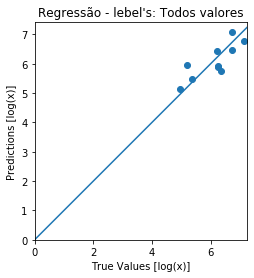

In [24]:
# Exibindo teste para regressão geral
plot_prediction(test_label, test_predicted, "Regressão - lebel's: Todos valores", "GeralRegression")

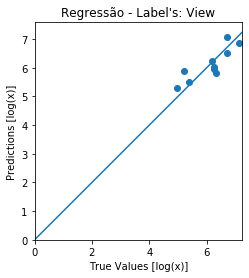

In [25]:
# Exibindo teste para regressão geral
plot_prediction(test_label, test_predicted_view, "Regressão - Label's: View", "ViewsRegression")

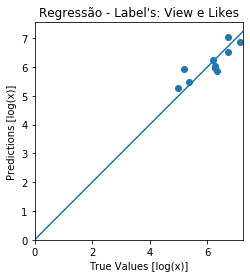

In [26]:
# Exibindo teste para regressão para like
plot_prediction(test_label, test_predicted_Viewlikes, "Regressão - Label's: View e Likes", "ViewLikesRegression")

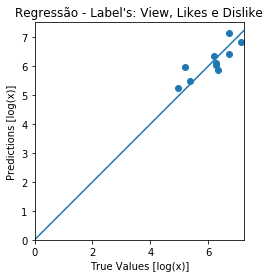

In [27]:
# Exibindo teste para regressão para dislike
plot_prediction(test_label, test_predicted_viewLikesDislike, "Regressão - Label's: View, Likes e Dislike", "LikeDislikeRegression")